In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [ ]:
trainer = pd.read_csv('/content/Telecom_Test.csv') 
tester  = pd.read_csv('/content/Telecom_Train.csv')

# New Section

In [ ]:

tester.shape

(1667, 21)

We can validate how much test/train data in ratios, having one-third of test data and two-third of training data is good ratio

In [ ]:
trainer.shape[0]/tester.shape[0]

1.9994001199760048

In [ ]:
trainer.head()

,Unnamed: 0,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,2,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,3,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,4,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,5,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


Check Different Data types

In [ ]:

trainer.dtypes.sort_values()

Unnamed: 0                         int64
account_length                     int64
total_intl_calls                   int64
number_vmail_messages              int64
total_night_calls                  int64
total_day_calls                    int64
number_customer_service_calls      int64
total_eve_calls                    int64
total_intl_charge                float64
total_intl_minutes               float64
total_night_charge               float64
total_night_minutes              float64
total_eve_minutes                float64
total_day_charge                 float64
total_day_minutes                float64
total_eve_charge                 float64
voice_mail_plan                   object
international_plan                object
area_code                         object
state                             object
churn                             object
dtype: object

Validate any missing Values in begining itself

In [ ]:
trainer.isna().sum()

Unnamed: 0                       0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

Validate Unique Values in each variable

In [ ]:
trainer.nunique().sort_values()

churn                               2
international_plan                  2
voice_mail_plan                     2
area_code                           3
number_customer_service_calls      10
total_intl_calls                   21
number_vmail_messages              46
state                              51
total_day_calls                   119
total_night_calls                 120
total_eve_calls                   123
total_intl_charge                 162
total_intl_minutes                162
account_length                    212
total_night_charge                933
total_eve_charge                 1440
total_night_minutes              1591
total_eve_minutes                1611
total_day_minutes                1667
total_day_charge                 1667
Unnamed: 0                       3333
dtype: int64

In [ ]:
def get_basis_stats(dfname):
  print("Shape of Dataframe is " + str(dfname.shape))
  print("Below are data types of columns in DF")
  print("------------------------------------------")
  print(dfname.dtypes.sort_values())
  print("Below are missing values")
  print("------------------------------------------")
  print(dfname.isna().sum().sort_values())
  print("Below are number of unique values for each column")
  print("------------------------------------------")
  print(dfname.nunique().sort_values())
  print("Print few records from dataframe")
  print("------------------------------------------")
  print(dfname.head())

In [ ]:
get_basis_stats(tester)

Shape of Dataframe is (1667, 21)
Below are data types of columns in DF
------------------------------------------
Unnamed: 0                         int64
account_length                     int64
total_intl_calls                   int64
number_vmail_messages              int64
total_night_calls                  int64
total_day_calls                    int64
number_customer_service_calls      int64
total_eve_calls                    int64
total_intl_charge                float64
total_intl_minutes               float64
total_night_charge               float64
total_night_minutes              float64
total_eve_minutes                float64
total_day_charge                 float64
total_day_minutes                float64
total_eve_charge                 float64
voice_mail_plan                   object
international_plan                object
area_code                         object
state                             object
churn                             object
dtype: object
Below are m

In [ ]:
trainer2 = trainer.copy()
tester2 = tester.copy()

Remove Any unnamed columns

In [ ]:
trainer2 = trainer2.drop('Unnamed: 0', axis=1)
tester2 = tester2.drop('Unnamed: 0', axis=1)

In [ ]:

trainer2.shape
tester2.shape

(1667, 20)

convert categorical value into numeric value

In [ ]:

trainer2['churn_num'] = trainer2['churn'].apply(lambda x: 1 if x=='yes' else 0)

In [ ]:
trainer2[['churn','churn_num']].head(20)

,churn,churn_num
0,no,0
1,no,0
2,no,0
3,no,0
4,no,0
5,no,0
6,no,0
7,no,0
8,no,0
9,no,0


In [ ]:
trainer2.groupby(['churn','churn_num']).size()

churn  churn_num
no     0            2850
yes    1             483
dtype: int64

Write a function to convert category into numeric

In [ ]:
def cat_to_binary(df, varname):
    df[varname + '_num']  = df[varname].apply(lambda x : 1 if x=='yes' else 0)
    print('validating....')
    print(df.groupby([varname +'_num',varname]).size())
    return df

In [ ]:
convert_list = ['churn','international_plan','voice_mail_plan']

In [ ]:
for varname in convert_list:
  trainer2 = cat_to_binary(tester2, varname)
  tester2 = cat_to_binary(trainer2,varname)

validating....
churn_num  churn
0          no       1443
1          yes       224
dtype: int64
validating....
churn_num  churn
0          no       1443
1          yes       224
dtype: int64
validating....
international_plan_num  international_plan
0                       no                    1517
1                       yes                    150
dtype: int64
validating....
international_plan_num  international_plan
0                       no                    1517
1                       yes                    150
dtype: int64
validating....
voice_mail_plan_num  voice_mail_plan
0                    no                 1266
1                    yes                 401
dtype: int64
validating....
voice_mail_plan_num  voice_mail_plan
0                    no                 1266
1                    yes                 401
dtype: int64


Let's do univariate Analysis, Here are the observation
1. area code 415 is little less than 50% of total value
2. area code 510 and 408 is equally shared.

(array([406.,   0.,   0.,   0.,   0., 421.,   0.,   0.,   0., 840.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

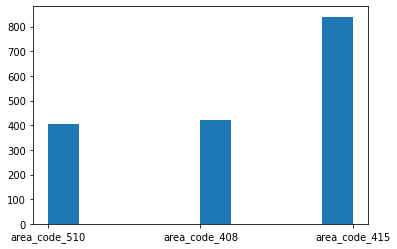

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(list(trainer2['area_code']))

1.By Default histogram bins=10, since state have more variable expand bins=100
2. Zoom figure to have clear view, we can see overall its well distribued data sets.

(array([33.,  0., 31.,  0., 38.,  0., 29.,  0., 31.,  0., 25.,  0., 26.,
         0., 31.,  0., 30.,  0., 44.,  0., 37.,  0., 41.,  0., 33.,  0.,
        41.,  0., 29.,  0., 23.,  0., 24.,  0., 30.,  0., 36.,  0., 36.,
         0., 27.,  0., 46.,  0., 38.,  0., 32.,  0., 25.,  0., 28.,  0.,
        34.,  0., 18.,  0., 28.,  0., 25.,  0., 52.,  0., 30.,  0., 40.,
         0., 44.,  0., 38.,  0., 44.,  0., 27.,  0., 41.,  0., 30.,  0.,
        32.,  0., 34.,  0., 34.,  0., 27.,  0., 25.,  0., 29.,  0., 31.,
         0., 39.,  0., 40.,  0., 32.,  0., 20., 29.]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
        16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
        22. , 22.5, 23. , 23.5, 24. , 24.5, 25. , 25.5, 26. , 26.5, 27. ,
        27.5, 28. , 28.5, 29. , 29.5, 30. , 30.5, 31. , 31.5, 32

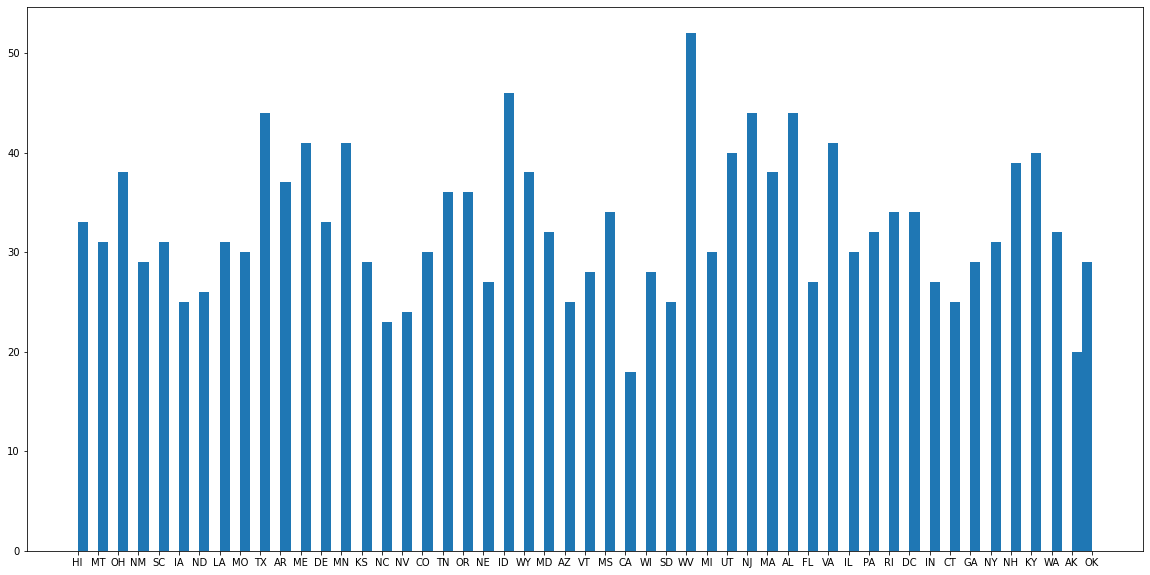

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(list(trainer2['state']), bins=100)

Analyze Binary Variables(Categorical Variable)

In [ ]:
trainer2.mean()

account_length                    98.646671
number_vmail_messages              7.067786
total_day_minutes                181.316197
total_day_calls                   99.217157
total_day_charge                  30.824337
total_eve_minutes                199.949190
total_eve_calls                  100.344331
total_eve_charge                  16.995903
total_night_minutes              199.431074
total_night_calls                 99.542292
total_night_charge                 8.974559
total_intl_minutes                10.310738
total_intl_calls                   4.346731
total_intl_charge                  2.784421
number_customer_service_calls      1.585483
churn_num                          0.134373
international_plan_num             0.089982
voice_mail_plan_num                0.240552
dtype: float64

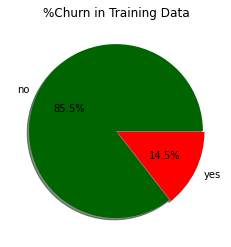

In [ ]:
#visualizing Churn Variables (Which you can see how much % of customers are churning)

topie = trainer['churn'].value_counts(sort=True)
colorss=["darkgreen","red"]
#plt.pie(topie, labels=topie.index.values, explode=[0,0.2], colors=colorss, autopct='%1.1f%%', shadow=True, startangle=180)
plt.pie(topie,labels=topie.index.values, explode=[0,0.02], colors= colorss, autopct = '%1.1f%%', shadow=True, startangle=360)
plt.title('%Churn in Training Data')
plt.show()

In [ ]:
# Continuous Variable, non-categorical and non-binary variables

continuous_vars = trainer2.select_dtypes([np.number]).columns.tolist()
continuous_vars

['account_length',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls',
 'churn_num',
 'international_plan_num',
 'voice_mail_plan_num']

In [ ]:
continuous_vars = [x for x in continuous_vars if '_num' not in x]

In [ ]:
calls_vars = [x for x in continuous_vars if '_calls' in x]

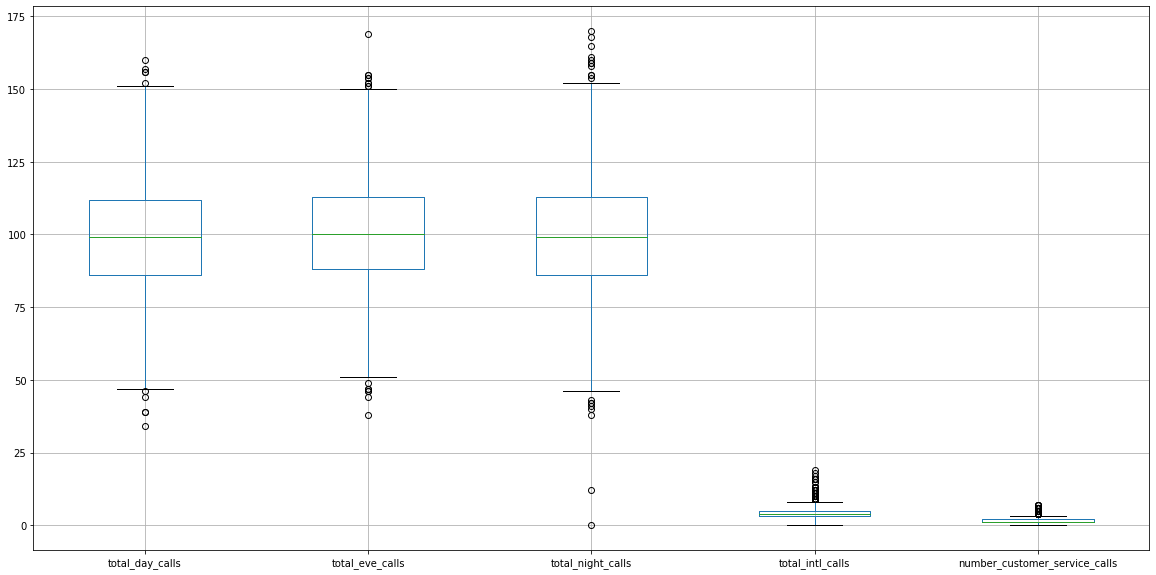

In [ ]:
trainer2.boxplot(column=calls_vars, figsize=(20,10))

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn', 'churn_num',
       'international_plan_num', 'voice_mail_plan_num'],
      dtype='object')
['total_intl_minutes', 'total_intl_calls', 'total_intl_charge']


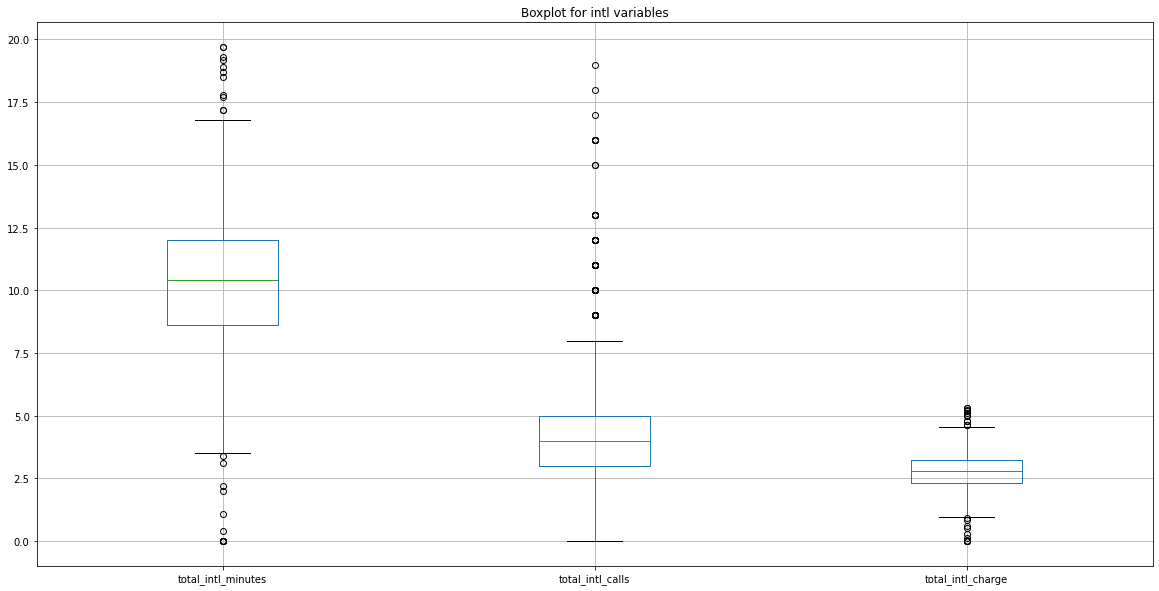

['number_customer_service_calls']


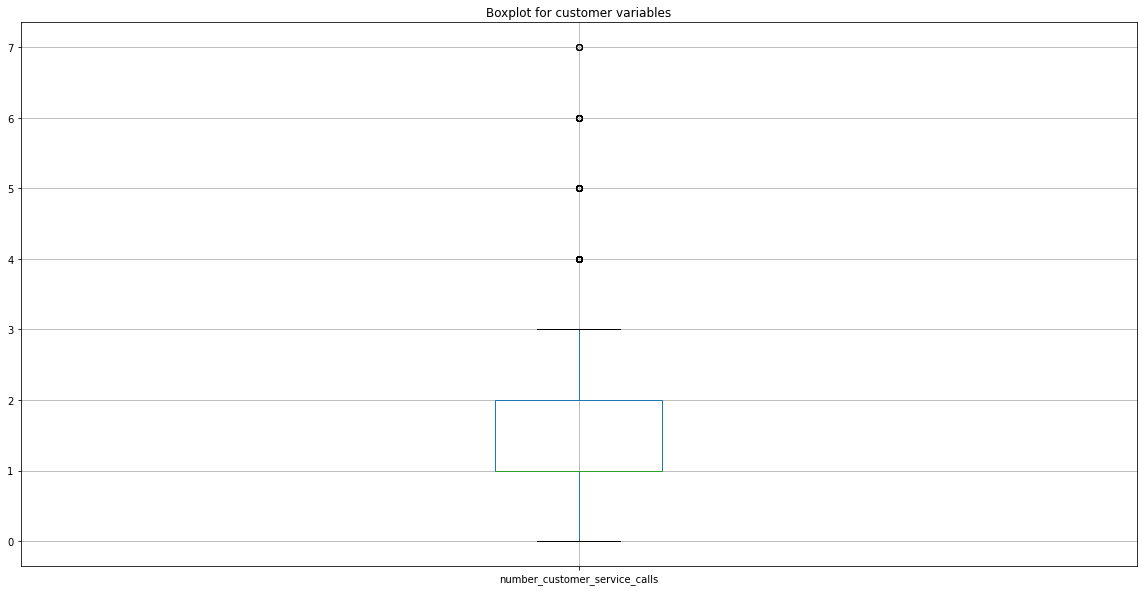

['total_eve_minutes', 'total_day_minutes', 'total_night_minutes']


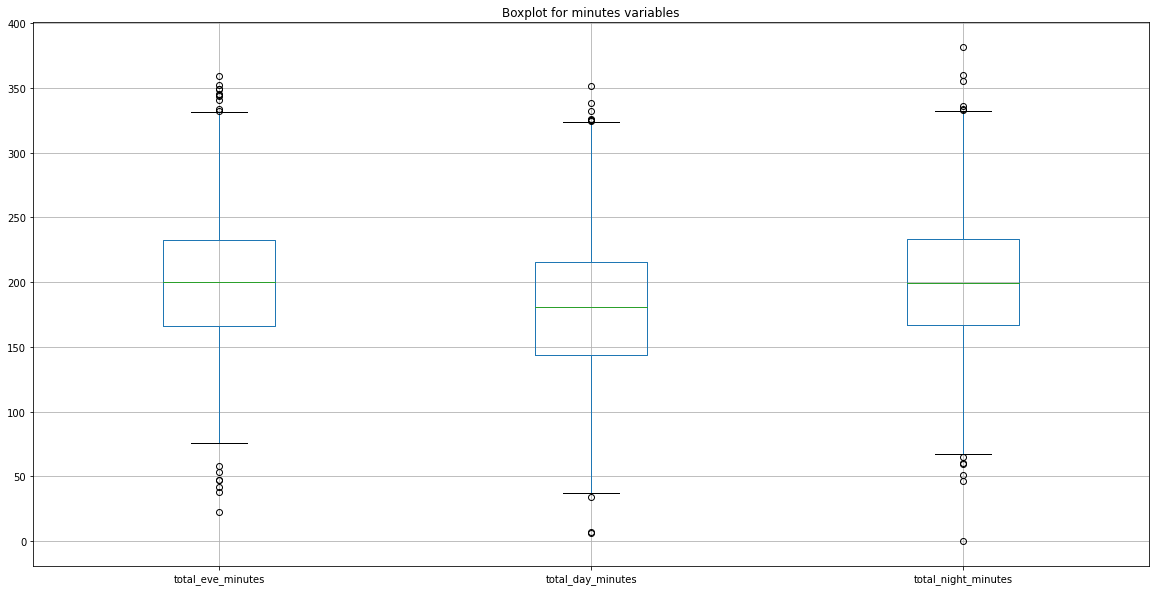

['total_day_calls', 'total_eve_calls', 'total_night_calls']


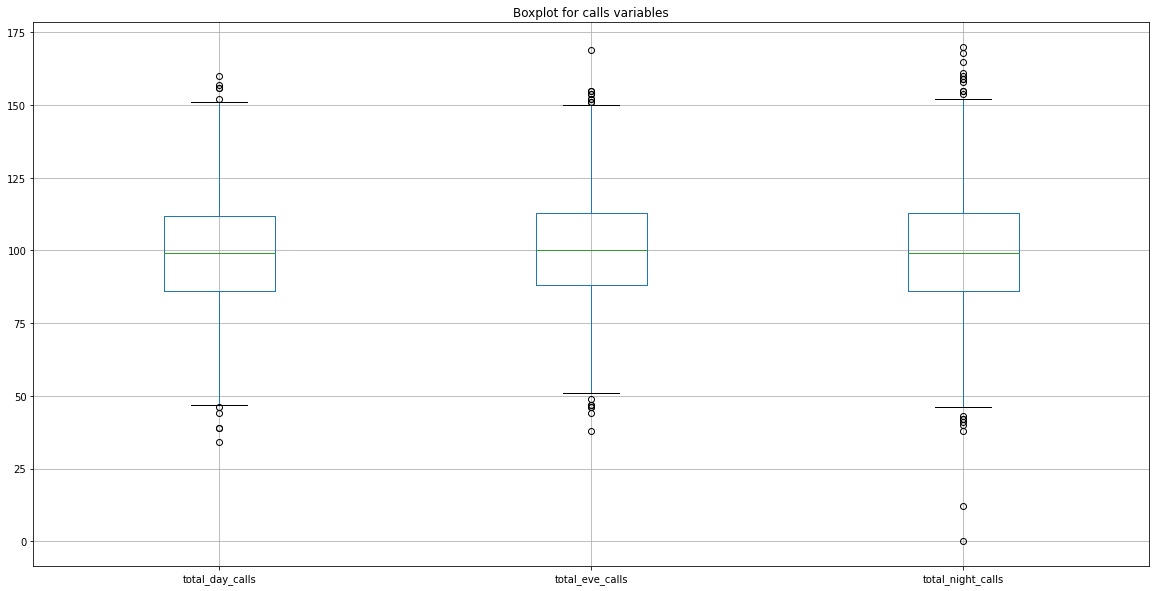

['total_night_charge', 'total_day_charge', 'total_eve_charge']


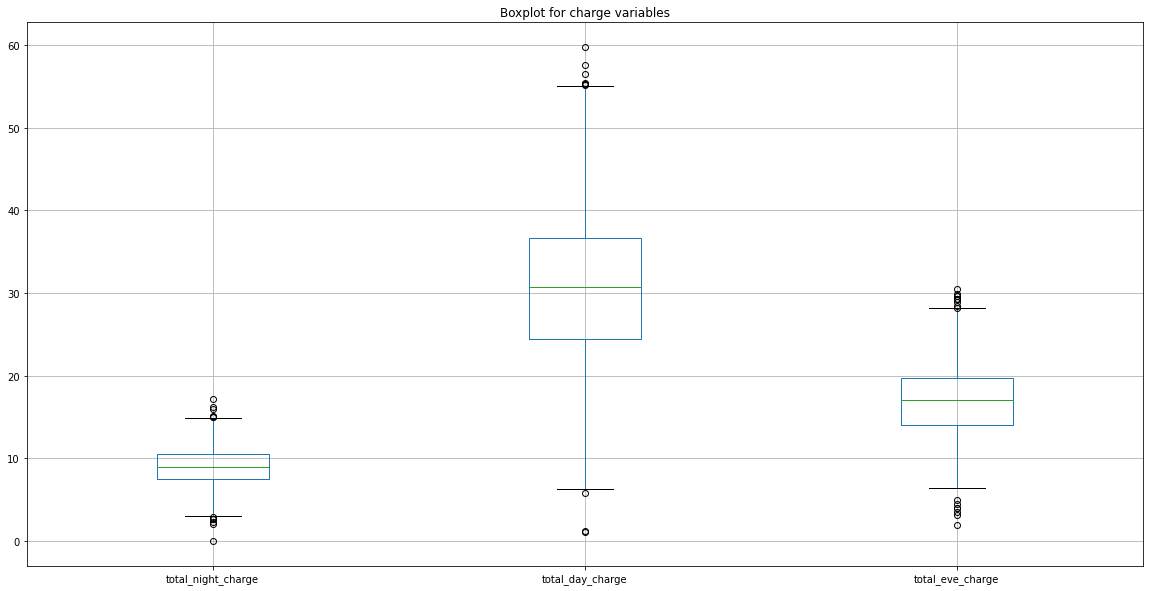

In [ ]:
#univariate analysis of continuous variables
type_of_vars = ['intl', 'customer', 'minutes', 'calls', 'charge']
remaining_list = trainer2.columns
print(remaining_list)
for vartype in type_of_vars:
  temp_list = [x for x in remaining_list if vartype in x]
  remaining_list = list(set(remaining_list).difference(set(temp_list)))
  print(temp_list)
  trainer2.boxplot(column=temp_list, figsize=(20,10))
  plt.title('Boxplot for '+vartype + ' variables')
  plt.show()

In [ ]:
#BiVariate Analysis
X= trainer2.drop('churn_num', axis=1)

In [ ]:
#Correlation 

X.corr().unstack().reset_index()

,level_0,level_1,0
0,account_length,account_length,1.000000
1,account_length,number_vmail_messages,-0.038609
2,account_length,total_day_minutes,-0.014926
3,account_length,total_day_calls,0.004267
4,account_length,total_day_charge,-0.014927
...,...,...,...
284,voice_mail_plan_num,total_intl_calls,-0.042491
285,voice_mail_plan_num,total_intl_charge,0.017487
286,voice_mail_plan_num,number_customer_service_calls,-0.006298
287,voice_mail_plan_num,international_plan_num,0.014308


In [ ]:
all_corr = X.corr().unstack().reset_index()
corr_table= all_corr[all_corr['level_0'] > all_corr['level_1']]
corr_table.columns = ['var1','var2','corr_value']
corr_table['corr_abs'] = corr_table['corr_value'].abs()
corr_table = corr_table.sort_values(by=['corr_abs'], ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
corr_table.head(10)

,var1,var2,corr_value,corr_abs
38,total_day_minutes,total_day_charge,1.000000,1.000000
92,total_eve_minutes,total_eve_charge,1.000000,1.000000
146,total_night_minutes,total_night_charge,0.999999,0.999999
200,total_intl_minutes,total_intl_charge,0.999992,0.999992
273,voice_mail_plan_num,number_vmail_messages,0.949129,0.949129
145,total_night_minutes,total_night_calls,0.056365,0.056365
179,total_night_charge,total_night_calls,0.056333,0.056333
159,total_night_calls,total_eve_calls,-0.054494,0.054494
123,total_eve_charge,total_day_charge,-0.047473,0.047473
89,total_eve_minutes,total_day_charge,-0.047471,0.047471


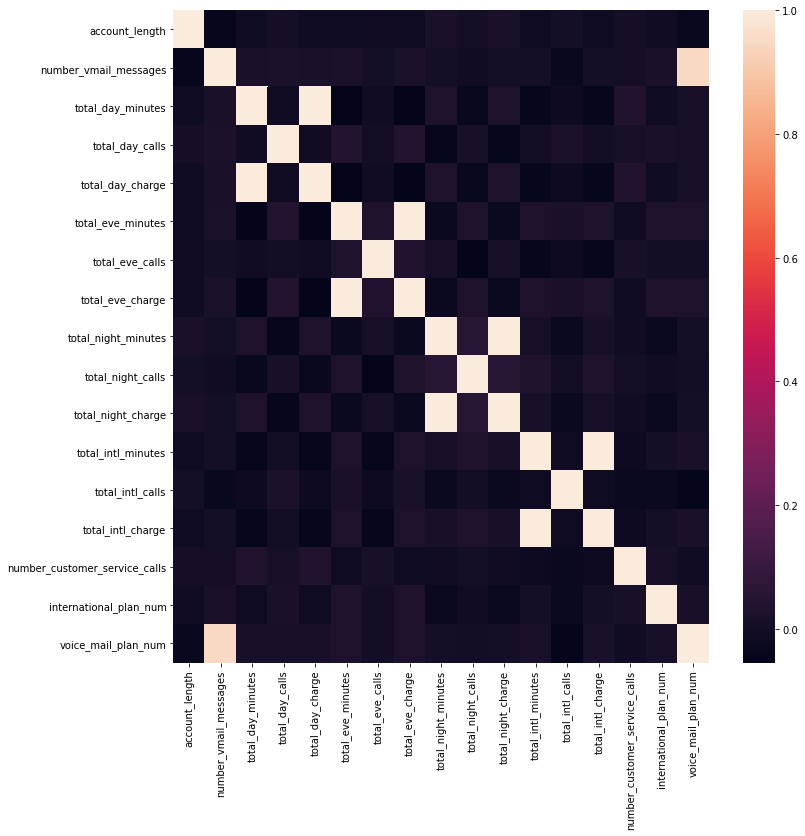

In [ ]:
#seaborn heatmap
plt.figure(figsize=(12,12))
sns.heatmap(X.corr())

In [ ]:
#Feature Creations

trainer2.columns

Index(['state', 'account_length', 'area_code', 'international_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churn', 'churn_num',
       'international_plan_num', 'voice_mail_plan_num'],
      dtype='object')

In [ ]:
trainer2['total_charges'] = trainer2['total_day_charge'] + trainer2['total_eve_charge'] + trainer2['total_night_charge'] + \
trainer2['total_intl_charge']

trainer2['total_charges']

0       43.54
1       65.63
2       87.48
3       61.77
4       55.38
        ...  
1662    75.09
1663    66.72
1664    51.82
1665    59.09
1666    54.18
Name: total_charges, Length: 1667, dtype: float64

['total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_charge']
['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_intl_minutes']
count    1667.000000
mean        0.100772
std         0.008091
min         0.071362
25%         0.095293
50%         0.100634
75%         0.105932
max         0.128430
Name: charge_per_minute, dtype: float64
count    1667.000000
mean        0.100772
std         0.008091
min         0.071362
25%         0.095293
50%         0.100634
75%         0.105932
max         0.128430
Name: charge_per_minute, dtype: float64


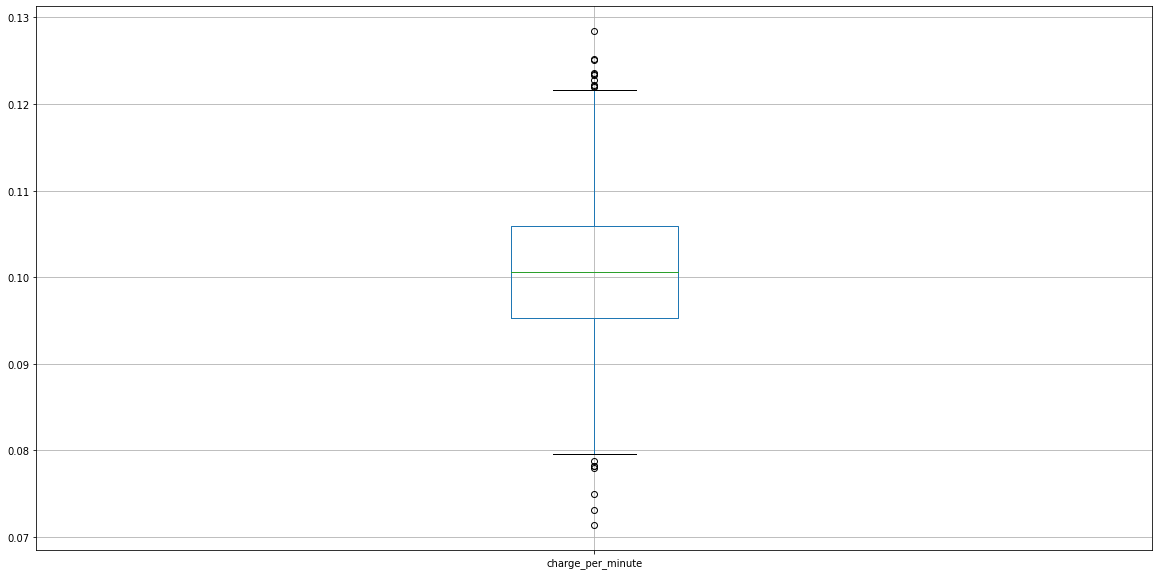

In [ ]:
# Creating Charge Per minute Variable in both test and training data frame.
# Intiutively, we expect customer with high value of this variable to have higher churn out
charge_vars = [x for x in trainer.columns if 'charge' in x]
minute_vars = [x for x in trainer.columns if 'minutes' in x]
print(charge_vars)
print(minute_vars)

def create_charge_per_minute(df):
    df['total_charges'] = 0
    df['total_minutes'] = 0
    for indexer in range(0, len(charge_vars)):
        df['total_charges'] += df[charge_vars[indexer]]
        df['total_minutes'] += df[minute_vars[indexer]]
    df['charge_per_minute'] = np.where(df['total_minutes']>0, df['total_charges']/df['total_minutes'], 0) 
    df.drop(['total_minutes', 'total_charges'], axis = 1, inplace = True);
    print(df['charge_per_minute'].describe())
    return df
   
trainer2= create_charge_per_minute(trainer2)
tester2 = create_charge_per_minute(tester2)
trainer2.boxplot(column='charge_per_minute', figsize=(20,10) )

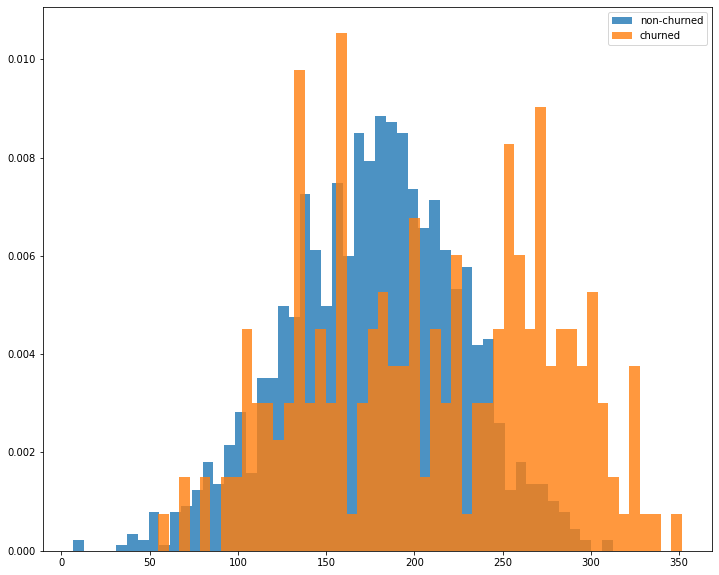

In [ ]:
plt.figure(figsize=(12,10))
plt.hist(trainer2[trainer2['churn_num']==0]['total_day_minutes'], bins = 50, density=True, label='non-churned', alpha=0.8)
plt.hist(trainer2[trainer2['churn_num']==1]['total_day_minutes'], bins = 50, density=True, label='churned', alpha=0.8)
plt.legend()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

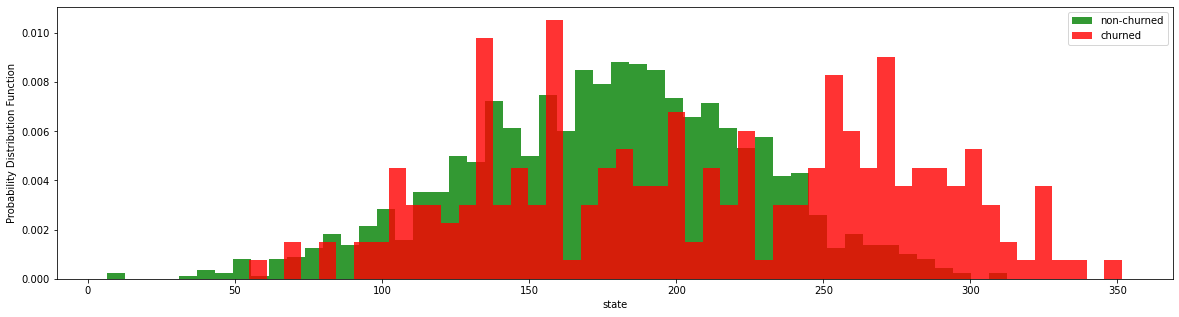

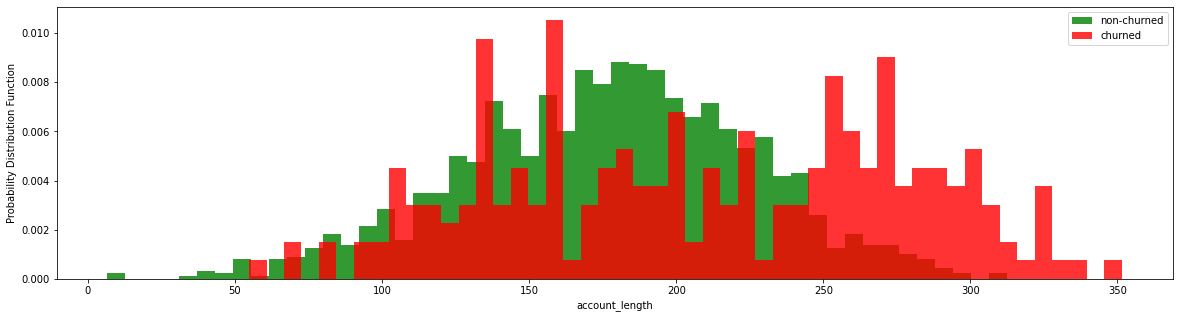

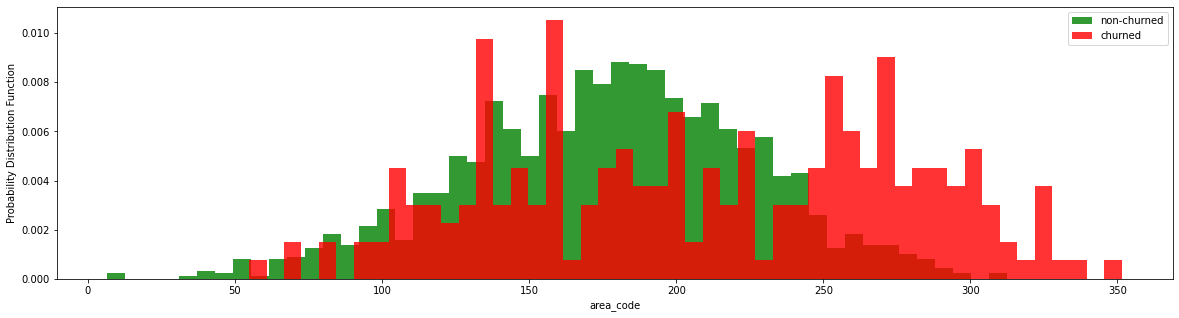

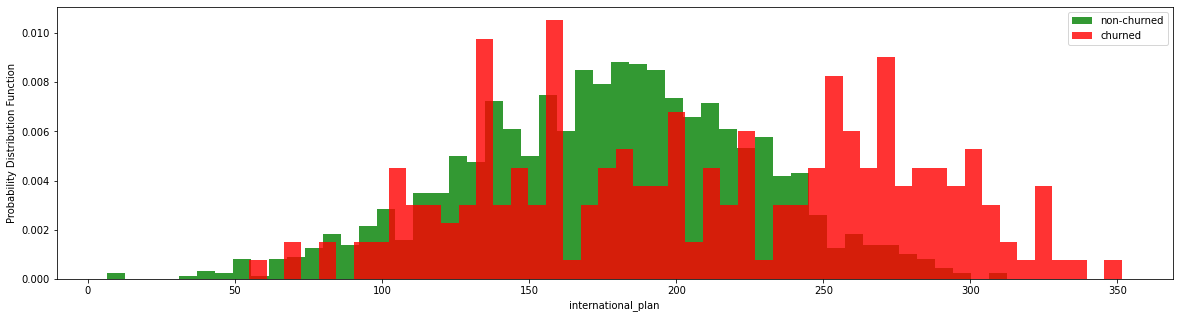

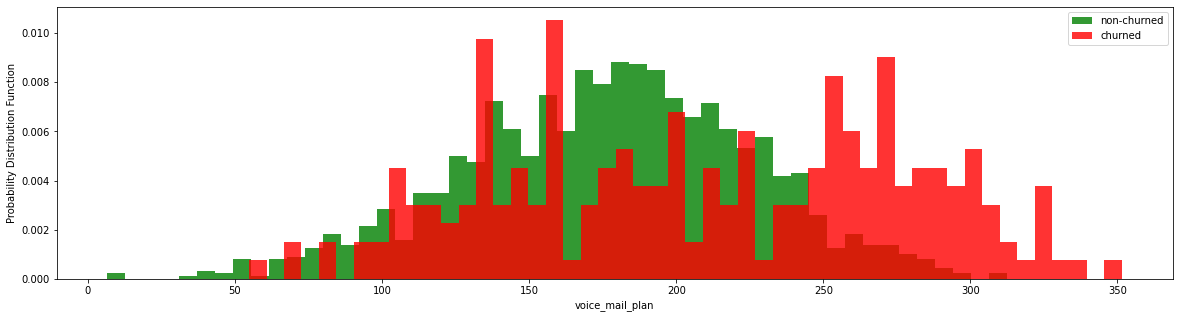

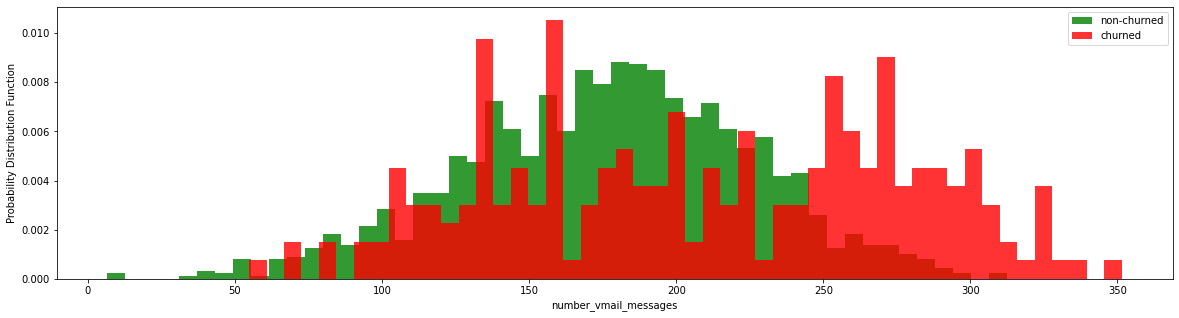

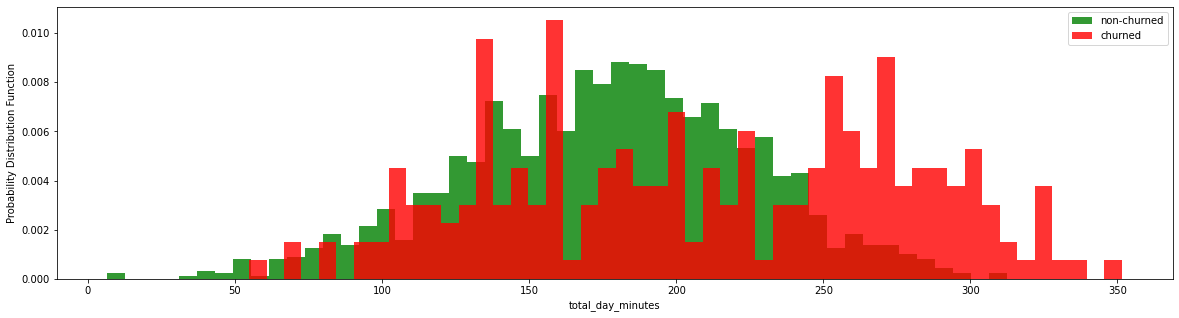

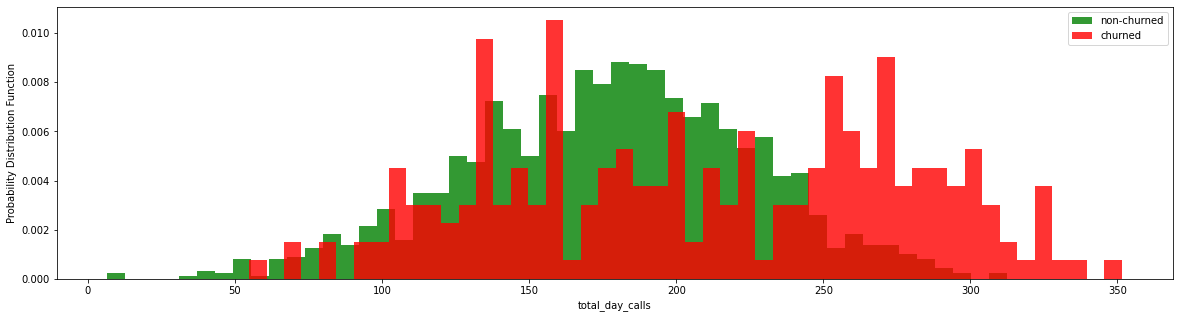

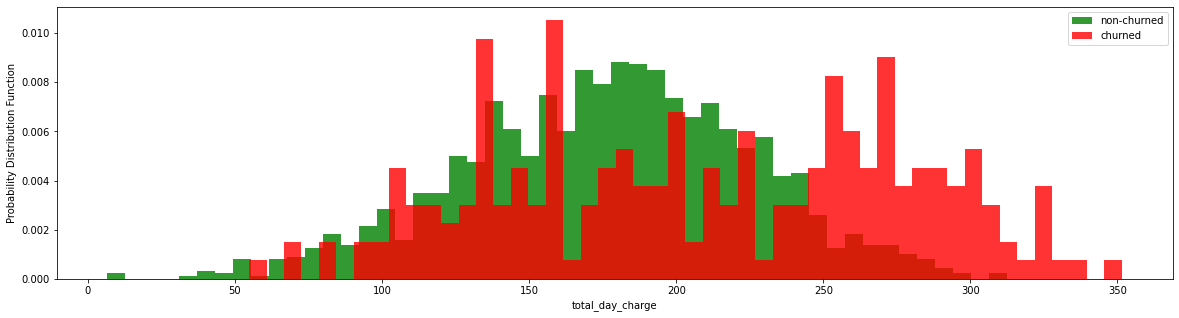

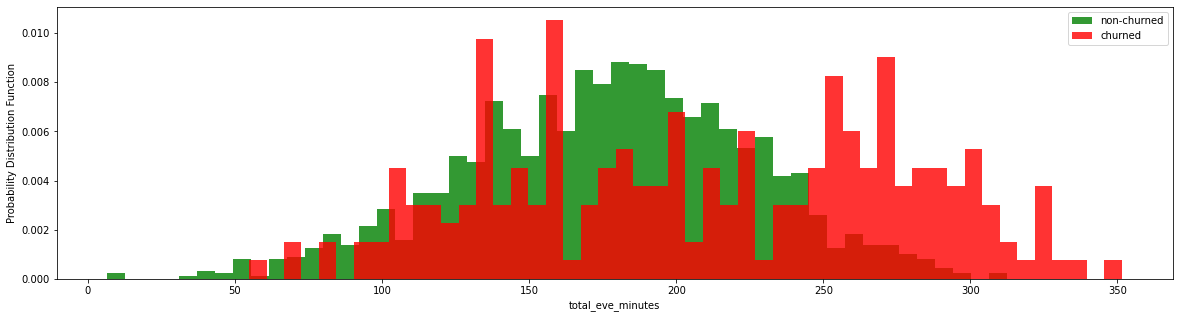

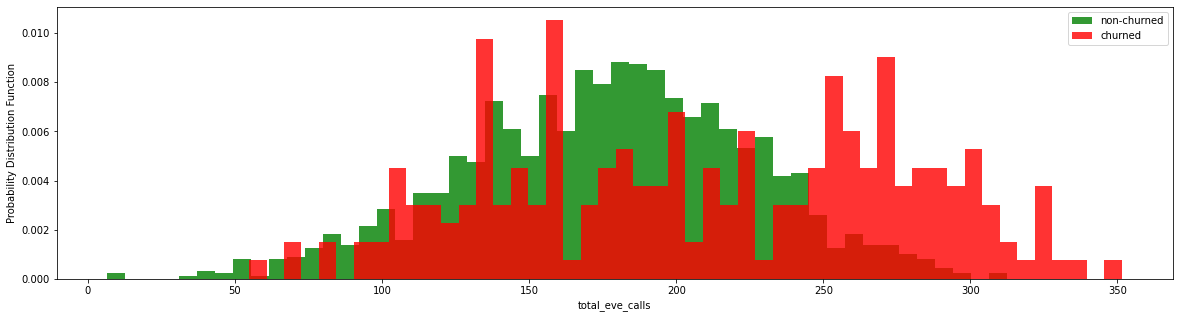

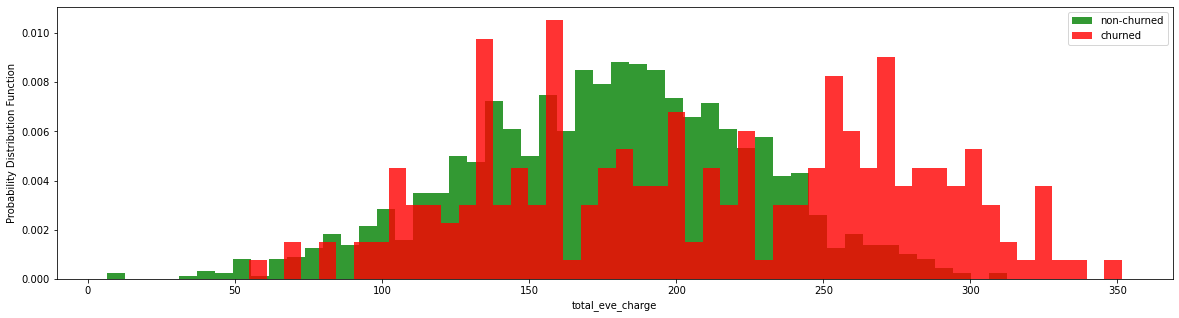

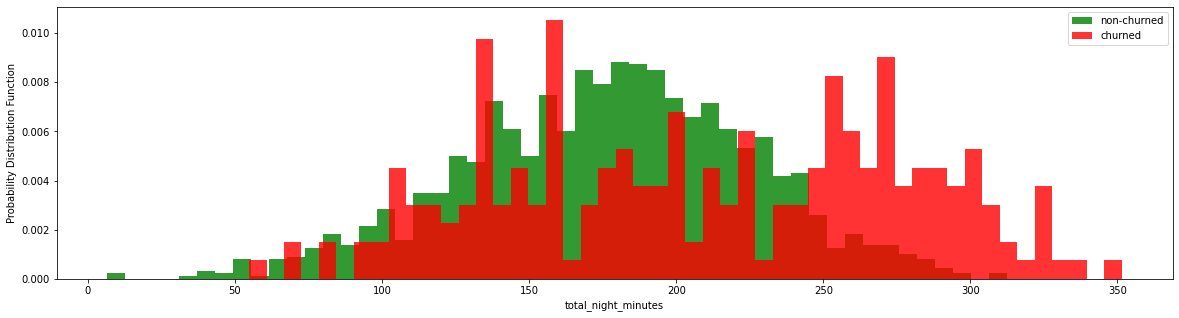

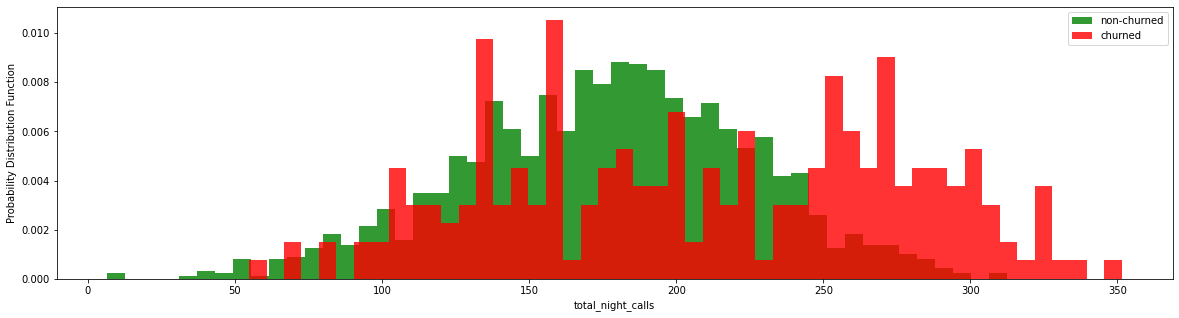

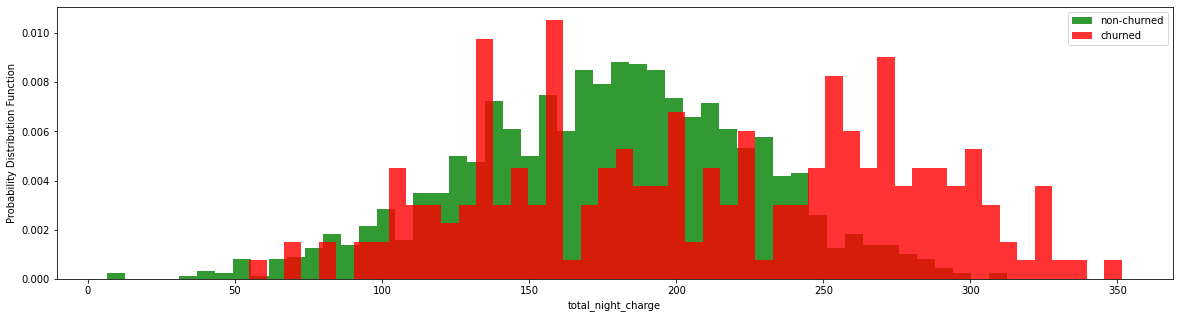

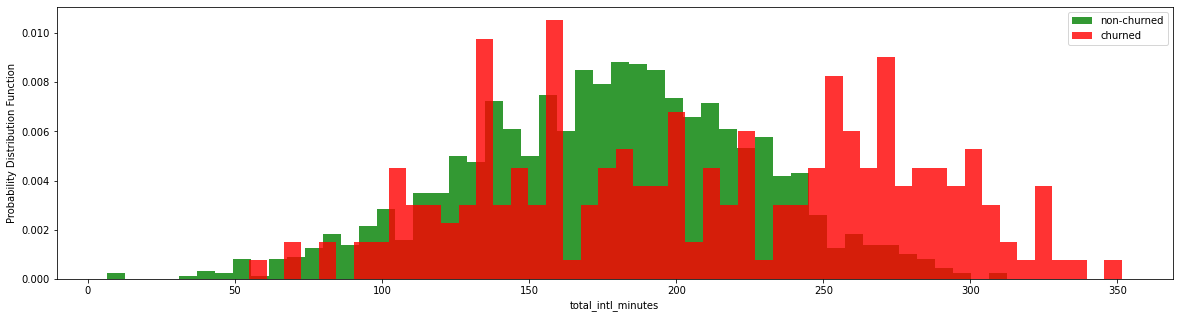

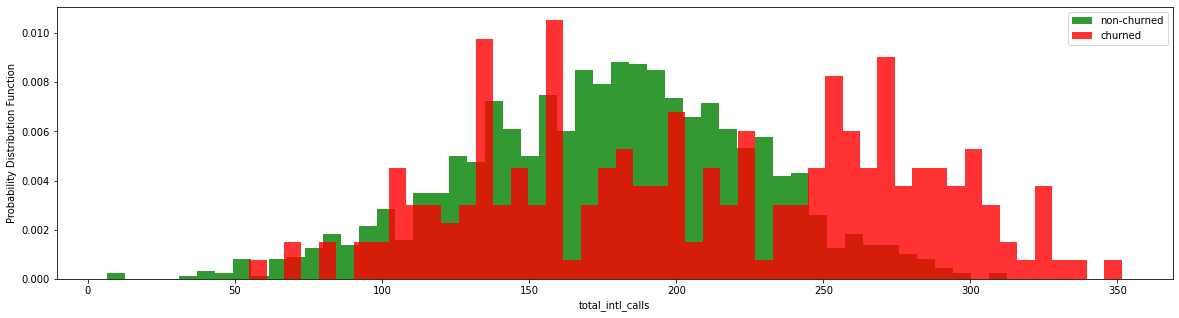

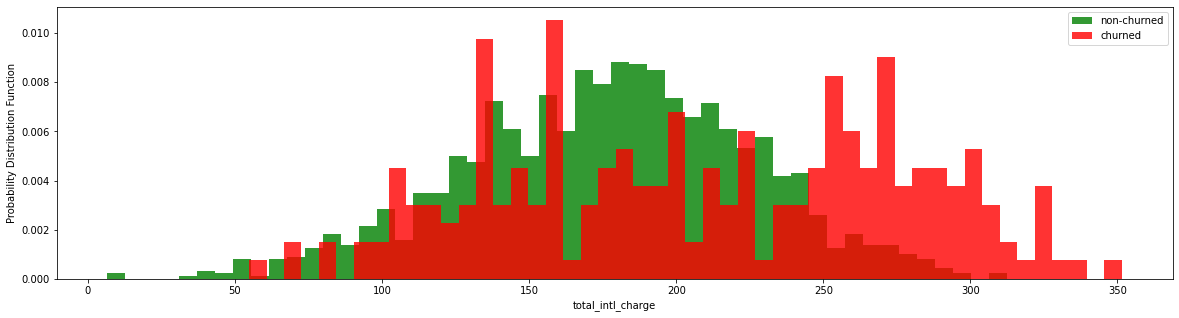

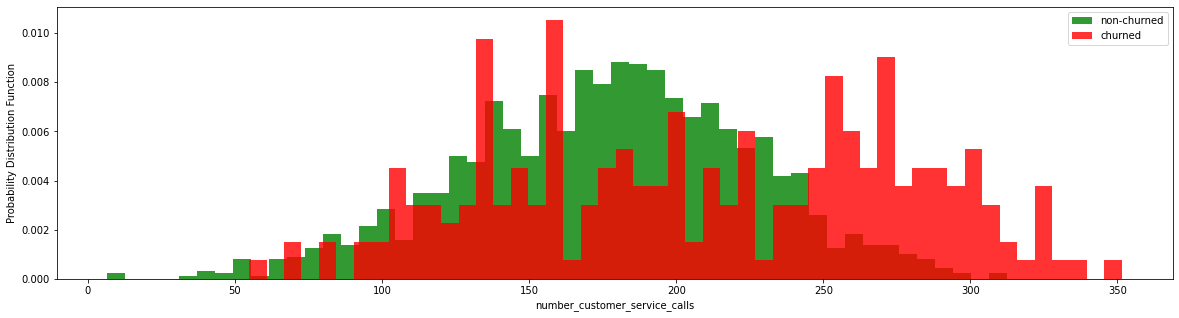

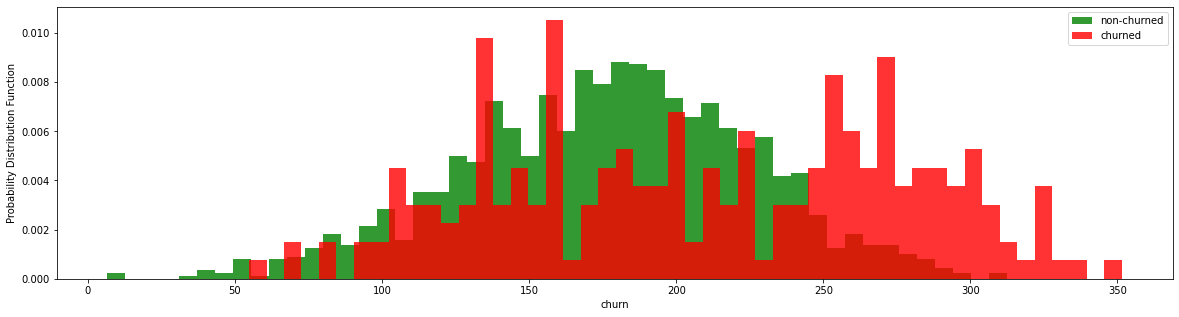

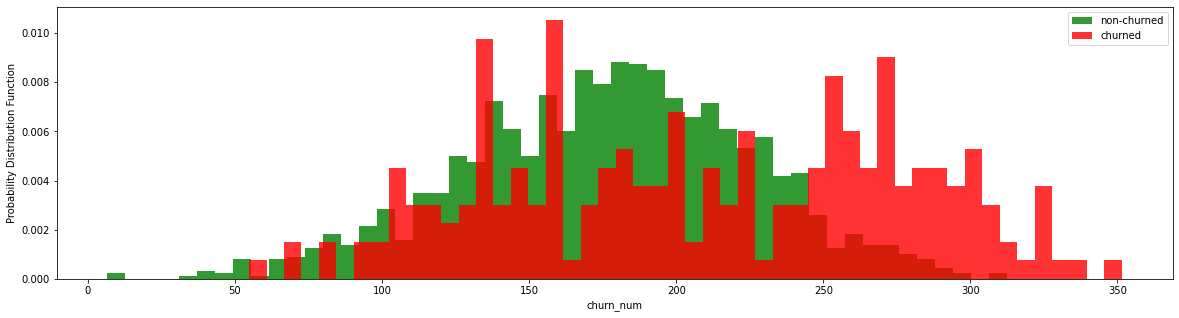

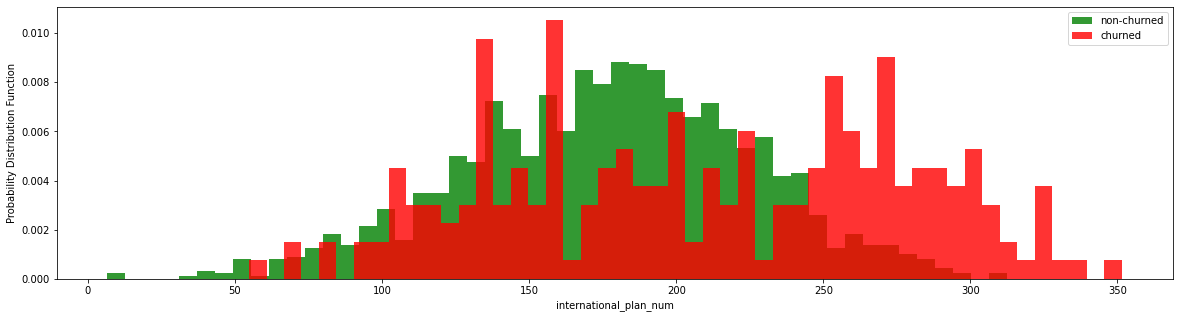

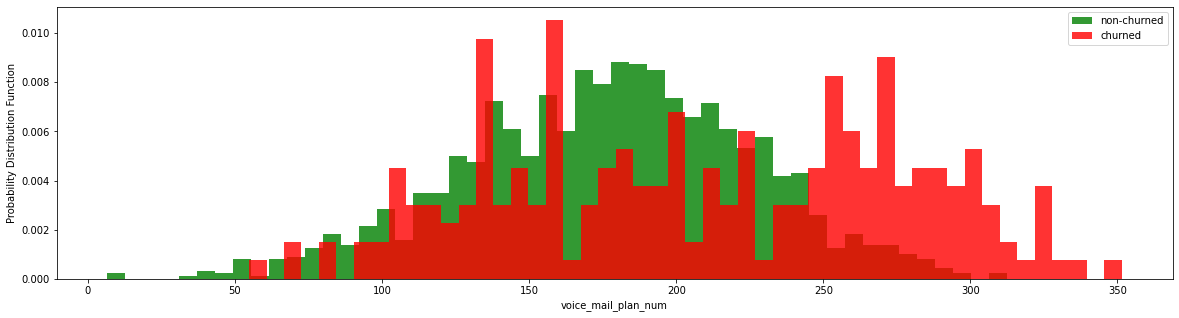

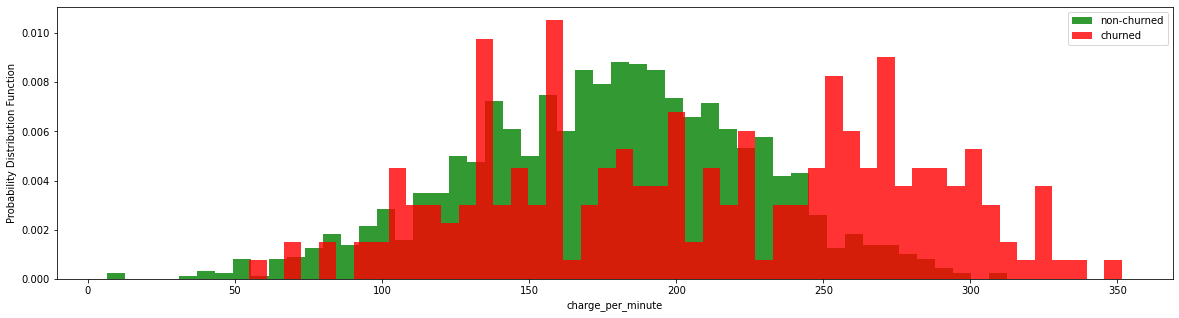

In [ ]:
def create_probability_density_function(df, varname):
  plt.figure(figsize=(20,5))
  plt.hist(trainer2[trainer2['churn_num']==0]['total_day_minutes'], bins = 50, density=True, color = 'g', label='non-churned', alpha=0.8)
  plt.hist(trainer2[trainer2['churn_num']==1]['total_day_minutes'], bins = 50, density=True, color = 'r', label='churned', alpha=0.8)
  plt.legend(loc='upper right')
  plt.xlabel(varname)
  plt.ylabel('Probability Distribution Function')
  plt.show

for varname in trainer2.columns:
    create_probability_density_function(trainer,varname)
   

Drop highly Correlated Variables

In [ ]:
drop_after_corr=['total_day_charge', 'total_eve_charge','total_night_charge','total_intl_charge','voice_mail_plan_num']
trainer3= trainer2.drop(drop_after_corr, axis=1)
print(trainer3.shape)
tester3= tester2.drop(drop_after_corr,axis=1)

(1667, 19)


In [ ]:
# one hot encoding of Categorical Variable
cat_columns = ['state','area_code']
trainer3 = pd.concat([trainer3,pd.get_dummies(trainer3[cat_columns], drop_first=True) ], axis=1 )
print(trainer3.shape)
tester3 =  pd.concat([tester3,pd.get_dummies(tester3[cat_columns], drop_first=True) ], axis=1 )
print(tester3.shape)

(1667, 71)
(1667, 71)


In [ ]:
trainer3= trainer3.drop(convert_list + cat_columns, axis=1)
print(trainer3.shape)
tester3 = tester3.drop(convert_list + cat_columns, axis=1)

(1667, 66)


In [ ]:
X_train = trainer3.drop('churn_num', axis=1)
X_test = tester3.drop('churn_num', axis=1)
Y_train = trainer3['churn_num']
Y_test = tester3['churn_num']


In [ ]:
#Modeling this is classification problem and use Logistic Regression

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression


lr= LogisticRegression(random_state =42, solver ='liblinear')
param_gridd = { 'penalty': ['l1','l2'] ,'C' : [0.1,1,2,3,5]}
# Cross validation default is 4, we can do with 5 folds
cv_lr = GridSearchCV(estimator=lr, param_grid=param_gridd, cv=5)

cv_lr.fit(X_train, Y_train)

#Getting best hyper parameter estimator
lr_best = cv_lr.best_estimator_
lr_best

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=42, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#using best hyper parameter we can execute tests data as well
import pandas as pd
test_score_lr = lr_best.predict_proba(X_test)[:, 1]
pd.Series(test_score_lr).describe()


count    1667.000000
mean        0.134737
std         0.173887
min         0.000887
25%         0.025711
50%         0.065007
75%         0.166968
max         0.985906
dtype: float64

In [ ]:
#Gradeint Boosting wtih hyper-parameter Tuning
from sklearn.metrics import auc, average_precision_score, f1_score, confusion_matrix, roc_auc_score, accuracy_score, log_loss,roc_curve,precision_recall_curve
from sklearn.ensemble import GradientBoostingClassifier

gbr =GradientBoostingClassifier(random_state=43)

param_grid = {
    'n_estimators' : [50,100,500], 'max_features' : ['auto'], 'learning_rate' : [0.01, 0.05,0.1,0.2]
}
CV_gbr = GridSearchCV(estimator=gbr, param_grid =param_grid, cv=5)
CV_gbr.fit(X_train, Y_train)
gbr_best = CV_gbr.best_estimator_
print(gbr_best)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=43, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [ ]:
# Test score for GBM for test data set

test_score_gbm = gbr_best.predict_proba(X_test)[:,1]
print(test_score_gbm)

[0.04102766 0.04793301 0.02180496 ... 0.03531899 0.02674927 0.03379496]


In [ ]:
#ROC
AUROC_lr = roc_auc_score(Y_test,test_score_lr)
#AU Precision Recall
AUPR_lr = average_precision_score(Y_test,test_score_lr)
print(AUROC_lr)
print(AUPR_lr)

0.8646854271854272
0.5418362538032971


In [ ]:
#ROC
AUROC_gbm = roc_auc_score(Y_test,test_score_gbm)
#AU Precision Recall
AUPR_gbm = average_precision_score(Y_test,test_score_gbm)
print(AUROC_gbm)
print(AUPR_gbm)

#Compare Gradient Boost Score with Logistic Regression Score, we have better AUPR Score in GBM

0.963374603999604
0.9214665606003797


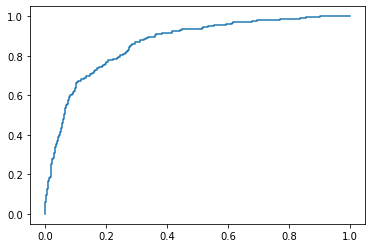

In [ ]:
# ROC Curve returns, False Positive Rate, True Positive Rate, Thresholds
# Following from Logisitc Regression

fpr_lr, tpr_lr, _ = roc_curve(Y_test, test_score_lr)

plt.plot(fpr_lr, tpr_lr)

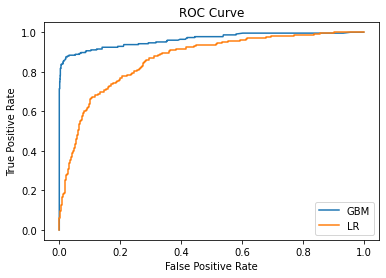

In [ ]:
# Let's do comparison between GB and Logisitc Regression Model

fpr_gbm, tpr_gbm, _ = roc_curve(Y_test, test_score_gbm)
plt.plot(fpr_gbm, tpr_gbm, label='GBM')
fpr_lr ,tpr_lr, _ = roc_curve(Y_test, test_score_lr)
plt.plot(fpr_lr, tpr_lr, label ='LR')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate");
plt.ylabel("True Positive Rate");
plt.legend()



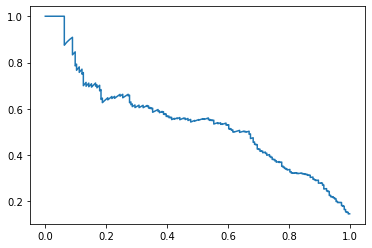

In [ ]:
#Precision recall Curve

prec_lr, recall_lr, _ = precision_recall_curve(Y_test,test_score_lr)
plt.plot(recall_lr, prec_lr)

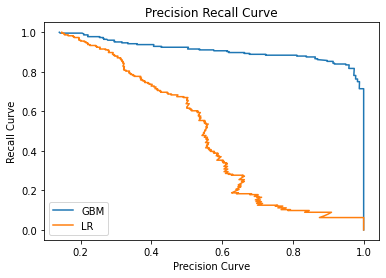

In [ ]:
# Let's do comparison between GB and Precision/Recall Curve Model

fpr_gbm, tpr_gbm, _ = precision_recall_curve(Y_test, test_score_gbm)
plt.plot(fpr_gbm, tpr_gbm, label='GBM')
fpr_lr ,tpr_lr, _ = precision_recall_curve(Y_test, test_score_lr)
plt.plot(fpr_lr, tpr_lr, label ='LR')
plt.title("Precision Recall Curve")
plt.xlabel("Precision Curve");
plt.ylabel("Recall Curve");
plt.legend()


In [ ]:
confusion_matrix(Y_test,(test_score_gbm >=0.5))

array([[1439,    4],
       [  52,  172]])

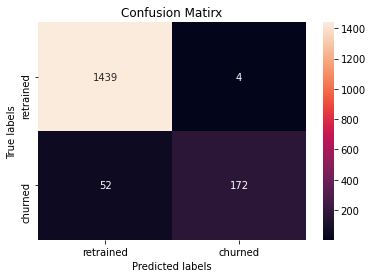

In [ ]:
#Confusion matrix Visualizing using SeaBorn

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, (test_score_gbm>=0.5))
ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt ='g')
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matirx');
ax.xaxis.set_ticklabels(['retrained', 'churned']);
ax.yaxis.set_ticklabels(['retrained', 'churned']);

In [ ]:
accuracy_score(Y_test, (test_score_gbm>=0.5))

#96% which is good

0.9664067186562687

In [ ]:
# Identify top 10 customer who are likely to Churn

get_top10 = pd.concat([pd.Series (test_score_gbm, name ='model_score'), Y_test], axis=1)
get_top10 = get_top10.sort_values(by=['model_score'], ascending=False)
get_top10.head()
get_top10['rownum'] = np.arange(len(get_top10))
get_top10[get_top10['rownum'] <= Y_test.shape[0]/10] ['churn_num'].value_counts()

1    165
0      2
Name: churn_num, dtype: int64

In [ ]:
#Recursive Feature Elimination
FI = pd.DataFrame([X_train.columns.tolist(), gbr_best.feature_importances_]).T
FI.columns = ['varname', 'importance']
FI = FI.sort_values(by= 'importance', ascending=False)
FI['cum_sum'] = FI['importance'].cumsum()
FI

,varname,importance,cum_sum
2,total_day_minutes,0.348657,0.348657
10,number_customer_service_calls,0.138417,0.487074
9,total_intl_calls,0.116023,0.603098
4,total_eve_minutes,0.113455,0.716553
11,international_plan_num,0.0899996,0.806552
...,...,...,...
34,state_MI,0,1
35,state_MN,0,1
36,state_MO,0,1
37,state_MS,0,1


In [ ]:
# Remove varaibles that is less contributing

def get_FI(modelname, dfname):
    feature_importance = pd.DataFrame([X_train.columns.tolist(), gbr_best.feature_importances_]).T
    feature_importance.columns = ['varname', 'importance']
    feature_importance = feature_importance.sort_values(by=['importance'], ascending= False)
    feature_importance['cum_importance'] = feature_importance['importance'].cumsum()
    return feature_importance


In [ ]:
# Remove Area and State

area_vars = [x for x in X_train.columns if 'area' in x]
state_vars = [x for x in X_train.columns if 'state' in x]
rfe_vars = area_vars +state_vars

X_train_rfe = X_train.drop(rfe_vars, axis=1)
X_test_rfe = X_test.drop(rfe_vars, axis=1)
X_train_rfe.shape

(1667, 13)

In [ ]:
# Let's Calculate Gradeint Boosting with Hyper Parameter Tuning


#Gradeint Boosting wtih hyper-parameter Tuning
from sklearn.metrics import auc, average_precision_score, f1_score, confusion_matrix, roc_auc_score, accuracy_score, log_loss,roc_curve,precision_recall_curve
from sklearn.ensemble import GradientBoostingClassifier

gbr =GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators' : [50,100,500], 'max_features' : ['auto'], 'learning_rate' : [0.01, 0.05,0.1,0.2]
}
CV_gbr = GridSearchCV(estimator=gbr, param_grid =param_grid, cv=5)
CV_gbr.fit(X_train_rfe, Y_train)
gbr_best_rfe = CV_gbr.best_estimator_
print(gbr_best_rfe)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


In [ ]:
test_score_gbm_rfe =  gbr_best_rfe.predict_proba(X_test_rfe)[:,1]

In [ ]:
#ROC
AUROC_gbm_rfe = roc_auc_score(Y_test,test_score_gbm_rfe)
#AU Precision Recall
AUPR_gbm_rfe = average_precision_score(Y_test,test_score_gbm_rfe)
print(AUROC_gbm_rfe)
print(AUPR_gbm_rfe)

#0.963374603999604 (Before feature elimination score)
#0.9214665606003797 (Before feature elimination score)

0.9579806454806455
0.9157667161355074


In [ ]:
FI = get_FI(gbr_best_rfe,X_train_rfe)
print(FI)

                          varname importance cum_importance
2               total_day_minutes   0.351352       0.351352
10  number_customer_service_calls   0.139991       0.491343
4               total_eve_minutes   0.116442       0.607786
9                total_intl_calls   0.116288       0.724074
11         international_plan_num  0.0908903       0.814964
..                            ...        ...            ...
60                       state_WI       None            NaN
61                       state_WV       None            NaN
62                       state_WY       None            NaN
63        area_code_area_code_415       None            NaN
64        area_code_area_code_510       None            NaN

[65 rows x 3 columns]


TypeError: ignored

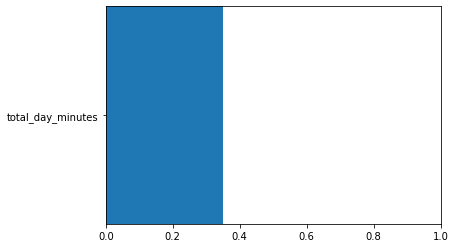

In [ ]:
vals= list(FI['importance'])
plt.barh(FI['varname'], FI['importance'])
plt.title('Importance of different variables')
plt.gca().xaxis.grid(linestyle=':')